In [1]:
import os

import altair as alt

import dms_variants
import dms_variants.codonvarianttable
from dms_variants.constants import CBPALETTE
import dms_variants.plotnine_themes

from plotnine import *

_ = theme_set(dms_variants.plotnine_themes.theme_graygrid())

import pandas as pd

import yaml

import warnings
warnings.filterwarnings('ignore')

In [2]:
# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

In [3]:
os.chdir('../../')

with open("config.yaml") as f:
    config = yaml.safe_load(f)

In [4]:
antibody_selections = pd.read_csv(config["antibody_selections"])

In [5]:
selection_groups = antibody_selections["selection_group"].unique()

prob_escape = pd.concat(
    [
        pd.read_csv(
            os.path.join(
                config["prob_escape_dir"], f"{selection_group}_prob_escape.csv"
            ),
            keep_default_na=False,
            na_values="nan",
        )
        for selection_group in selection_groups
    ],
    ignore_index=True,
)

In [6]:
# get data to plot
no_ab_counts = (
    prob_escape[
        [
            "library",
            "no-antibody_sample",
            "aa_substitutions_sequential",
            "no-antibody_count",
            "barcode",
            "no_antibody_count_threshold",
        ]
    ]
    .drop_duplicates()
    .assign(
        variant_above_threshold=lambda x: (
            x["no-antibody_count"] >= x["no_antibody_count_threshold"]
        ).astype(int),
        count_above_threshold=lambda x: x["no-antibody_count"]
        * x["variant_above_threshold"],
    ))

no_ab_counts['sample'] = no_ab_counts['library'] + '_' + no_ab_counts['no-antibody_sample']

In [7]:
no_ab_counts['date'] = no_ab_counts['no-antibody_sample'].str.split('_', expand=True)[0]

ausab13_full_seq = no_ab_counts[(no_ab_counts['date'] == '220711')]

ausab13_full_seq

,library,no-antibody_sample,aa_substitutions_sequential,no-antibody_count,barcode,no_antibody_count_threshold,variant_above_threshold,count_above_threshold,sample,date
1820580,libA,220711_1_no-antibody_control_1,K297I,356009,ATAACACAAAAAAGTA,15,1,356009,libA_220711_1_no-antibody_control_1,220711
1820581,libA,220711_1_no-antibody_control_1,Y113N T150K L263H V342Y,104849,AGACACTAAATACAGC,15,1,104849,libA_220711_1_no-antibody_control_1,220711
1820582,libA,220711_1_no-antibody_control_1,K46A I301V E409M,104183,AAAAATCTGAGACAAA,15,1,104183,libA_220711_1_no-antibody_control_1,220711
1820583,libA,220711_1_no-antibody_control_1,,98240,AGCCTATTAGGATTCG,15,1,98240,libA_220711_1_no-antibody_control_1,220711
1820584,libA,220711_1_no-antibody_control_1,R111S V366M R402S,91880,TATCTACCTAACGAAA,15,1,91880,libA_220711_1_no-antibody_control_1,220711
...,...,...,...,...,...,...,...,...,...,...
2238614,libB,220711_1_no-antibody_control_1,V107I T179F S238Q,0,TTTTTGTGGGGTCTTC,15,0,0,libB_220711_1_no-antibody_control_1,220711
2238615,libB,220711_1_no-antibody_control_1,Y119H I211K S212L,0,TTTTTTAAATTAATCC,15,0,0,libB_220711_1_no-antibody_control_1,220711
2238616,libB,220711_1_no-antibody_control_1,S157F G161S S212G R239F,0,TTTTTTCGATAGTCCT,15,0,0,libB_220711_1_no-antibody_control_1,220711
2238617,libB,220711_1_no-antibody_control_1,N152S H175A I211D Q216S K297F D310Q,0,TTTTTTTAAGACAAAC,15,0,0,libB_220711_1_no-antibody_control_1,220711


In [10]:
ausab13_wt = ausab13_full_seq.loc[ausab13_full_seq['aa_substitutions_sequential'] == '']
ausab13_wt = ausab13_wt.drop(
    ['no_antibody_count_threshold', 'variant_above_threshold', 'count_above_threshold'], axis=1)
ausab13_wt

,library,no-antibody_sample,aa_substitutions_sequential,no-antibody_count,barcode,sample,date
1820583,libA,220711_1_no-antibody_control_1,,98240,AGCCTATTAGGATTCG,libA_220711_1_no-antibody_control_1,220711
1820852,libA,220711_1_no-antibody_control_1,,5583,AAACATATGCAATATT,libA_220711_1_no-antibody_control_1,220711
1820858,libA,220711_1_no-antibody_control_1,,5361,TCGTTCTGAAGCTACT,libA_220711_1_no-antibody_control_1,220711
1820862,libA,220711_1_no-antibody_control_1,,5354,TTAGTCGGACATAAGA,libA_220711_1_no-antibody_control_1,220711
1820865,libA,220711_1_no-antibody_control_1,,5756,ACAGTGTAAAGGGAAA,libA_220711_1_no-antibody_control_1,220711
...,...,...,...,...,...,...,...
2238436,libB,220711_1_no-antibody_control_1,,1,TTTGAATTGACTGAAA,libB_220711_1_no-antibody_control_1,220711
2238450,libB,220711_1_no-antibody_control_1,,0,TTTGATACTCATGGAC,libB_220711_1_no-antibody_control_1,220711
2238565,libB,220711_1_no-antibody_control_1,,0,TTTTCACGGAAATGCA,libB_220711_1_no-antibody_control_1,220711
2238571,libB,220711_1_no-antibody_control_1,,0,TTTTCATTCGCGAATC,libB_220711_1_no-antibody_control_1,220711


In [13]:
ausab13_wt['threshold_5'] = ausab13_wt['no-antibody_count'] >= 5
ausab13_wt['threshold_10'] = ausab13_wt['no-antibody_count'] >= 10
ausab13_wt['threshold_15'] = ausab13_wt['no-antibody_count'] >= 15
ausab13_wt['threshold_20'] = ausab13_wt['no-antibody_count'] >= 20

ausab13_wt

,library,no-antibody_sample,aa_substitutions_sequential,no-antibody_count,barcode,sample,date,threshold_5,threshold_10,threshold_15,threshold_20
1820583,libA,220711_1_no-antibody_control_1,,98240,AGCCTATTAGGATTCG,libA_220711_1_no-antibody_control_1,220711,True,True,True,True
1820852,libA,220711_1_no-antibody_control_1,,5583,AAACATATGCAATATT,libA_220711_1_no-antibody_control_1,220711,True,True,True,True
1820858,libA,220711_1_no-antibody_control_1,,5361,TCGTTCTGAAGCTACT,libA_220711_1_no-antibody_control_1,220711,True,True,True,True
1820862,libA,220711_1_no-antibody_control_1,,5354,TTAGTCGGACATAAGA,libA_220711_1_no-antibody_control_1,220711,True,True,True,True
1820865,libA,220711_1_no-antibody_control_1,,5756,ACAGTGTAAAGGGAAA,libA_220711_1_no-antibody_control_1,220711,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2238436,libB,220711_1_no-antibody_control_1,,1,TTTGAATTGACTGAAA,libB_220711_1_no-antibody_control_1,220711,False,False,False,False
2238450,libB,220711_1_no-antibody_control_1,,0,TTTGATACTCATGGAC,libB_220711_1_no-antibody_control_1,220711,False,False,False,False
2238565,libB,220711_1_no-antibody_control_1,,0,TTTTCACGGAAATGCA,libB_220711_1_no-antibody_control_1,220711,False,False,False,False
2238571,libB,220711_1_no-antibody_control_1,,0,TTTTCATTCGCGAATC,libB_220711_1_no-antibody_control_1,220711,False,False,False,False


In [14]:
pacbio_total = (ausab13_wt.groupby(['library'])
                .size()
                .reset_index(name='pacbio_lib_size')
               )
pacbio_total

,library,pacbio_lib_size
0,libA,2244
1,libB,4597


In [21]:
thresholds = [5, 10, 15, 20]

df_list = []

for num in thresholds:
    threshold_variants = (ausab13_wt.groupby(['library', f'threshold_{num}'])
                          .size()
                          .reset_index(name=f'var_above_{num}')
                         )
    threshold_variants = threshold_variants.rename(columns={'library': f'library_{num}'})
    df_list.append(threshold_variants)

df_list

[  library_5  threshold_5  var_above_5
 0      libA        False          195
 1      libA         True         2049
 2      libB        False          836
 3      libB         True         3761,
   library_10  threshold_10  var_above_10
 0       libA         False           285
 1       libA          True          1959
 2       libB         False          1152
 3       libB          True          3445,
   library_15  threshold_15  var_above_15
 0       libA         False           363
 1       libA          True          1881
 2       libB         False          1415
 3       libB          True          3182,
   library_20  threshold_20  var_above_20
 0       libA         False           433
 1       libA          True          1811
 2       libB         False          1616
 3       libB          True          2981]

In [34]:
df_concat = pd.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=1)
df_concat

,library_5,threshold_5,var_above_5,library_10,threshold_10,var_above_10,library_15,threshold_15,var_above_15,library_20,threshold_20,var_above_20
0,libA,False,195,libA,False,285,libA,False,363,libA,False,433
1,libA,True,2049,libA,True,1959,libA,True,1881,libA,True,1811
2,libB,False,836,libB,False,1152,libB,False,1415,libB,False,1616
3,libB,True,3761,libB,True,3445,libB,True,3182,libB,True,2981


In [35]:
df_concat = df_concat.rename(
    columns={'library_5': 'library',
             'var_above_5': '5', 
             'var_above_10': '10',
             'var_above_15': '15',
             'var_above_20': '20'
            }).drop(['library_10', 'library_15', 'library_20'], axis=1)
df_concat

,library,threshold_5,5,threshold_10,10,threshold_15,15,threshold_20,20
0,libA,False,195,False,285,False,363,False,433
1,libA,True,2049,True,1959,True,1881,True,1811
2,libB,False,836,False,1152,False,1415,False,1616
3,libB,True,3761,True,3445,True,3182,True,2981


In [36]:
df_concat = df_concat.loc[df_concat['threshold_5'] == True]
df_concat

,library,threshold_5,5,threshold_10,10,threshold_15,15,threshold_20,20
1,libA,True,2049,True,1959,True,1881,True,1811
3,libB,True,3761,True,3445,True,3182,True,2981


In [37]:
df_concat = df_concat.merge(pacbio_total,
                            how='left',
                            on='library'
                           )
df_concat

,library,threshold_5,5,threshold_10,10,threshold_15,15,threshold_20,20,pacbio_lib_size
0,libA,True,2049,True,1959,True,1881,True,1811,2244
1,libB,True,3761,True,3445,True,3182,True,2981,4597


In [45]:
wt_variant_thresholds = df_concat.melt(
    id_vars = ['library', 'pacbio_lib_size'],
    value_vars = ['5', '10', '15', '20'],
    var_name = 'threshold',
    value_name = 'counts'
)
wt_variant_thresholds

,library,pacbio_lib_size,threshold,counts
0,libA,2244,5,2049
1,libB,4597,5,3761
2,libA,2244,10,1959
3,libB,4597,10,3445
4,libA,2244,15,1881
5,libB,4597,15,3182
6,libA,2244,20,1811
7,libB,4597,20,2981


In [46]:
wt_variant_thresholds['fraction_pacbio'] = (wt_variant_thresholds['counts'] /
                                            wt_variant_thresholds['pacbio_lib_size']
                                           )
wt_variant_thresholds['threshold'] = wt_variant_thresholds['threshold'].astype(float)

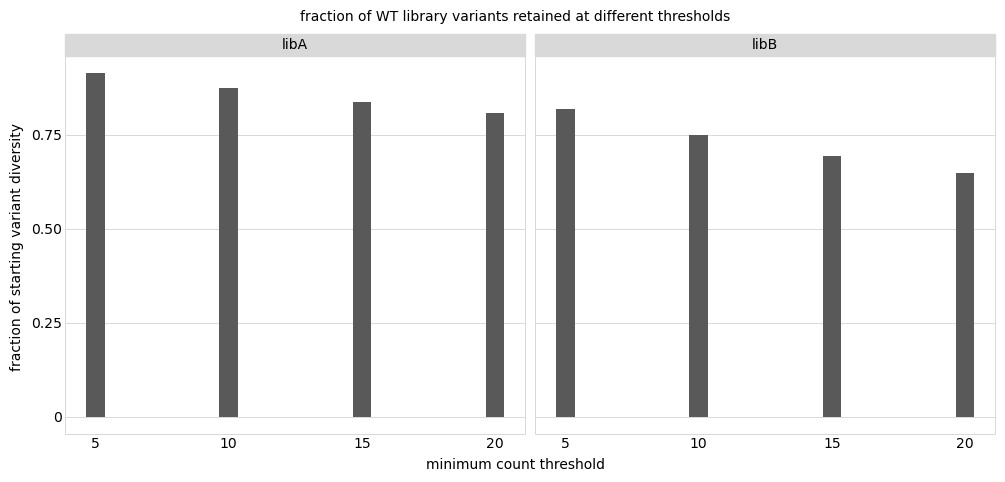

In [47]:
p = (
    ggplot(
        wt_variant_thresholds,
        aes(x='threshold', 
            y='fraction_pacbio'
           )
    ) +
    geom_bar(stat='identity', position=position_dodge(), width=0.7) +
    theme(figure_size=(12, 5),
         panel_grid_major_x=element_blank(),
         ) + 
    scale_fill_manual(values=CBPALETTE[2:]) +
    labs(x='minimum count threshold', 
         y='fraction of starting variant diversity', 
         title='fraction of WT library variants retained at different thresholds')
)

p = p + facet_wrap('~ library', nrow = 1)

_ = p.draw()


In [48]:
wt_variant_thresholds

,library,pacbio_lib_size,threshold,counts,fraction_pacbio
0,libA,2244,5.0,2049,0.913102
1,libB,4597,5.0,3761,0.818142
2,libA,2244,10.0,1959,0.872995
3,libB,4597,10.0,3445,0.749402
4,libA,2244,15.0,1881,0.838235
5,libB,4597,15.0,3182,0.692191
6,libA,2244,20.0,1811,0.807041
7,libB,4597,20.0,2981,0.648466


[                     fate    count library  \
 0     unparseable barcode  4597323    libA   
 1     low quality barcode  2161680    libA   
 2  failed chastity filter        0    libA   
 3           valid barcode  1956192    libA   
 4         invalid barcode  7144546    libA   
 
                                  sample  
 0  220224_1_antibody_AUSAB-07_0.00079_1  
 1  220224_1_antibody_AUSAB-07_0.00079_1  
 2  220224_1_antibody_AUSAB-07_0.00079_1  
 3  220224_1_antibody_AUSAB-07_0.00079_1  
 4  220224_1_antibody_AUSAB-07_0.00079_1  ,
                      fate    count library  \
 0     unparseable barcode  4597323    libA   
 1     low quality barcode  2161680    libA   
 2  failed chastity filter        0    libA   
 3           valid barcode  1956192    libA   
 4         invalid barcode  7144546    libA   
 
                                  sample  
 0  220224_1_antibody_AUSAB-07_0.00158_1  
 1  220224_1_antibody_AUSAB-07_0.00158_1  
 2  220224_1_antibody_AUSAB-07_0.00158_1  
 

In [4]:
samples = ['libA_220224_1_no-antibody_control', 
           'libA_220419_1_no-antibody_control', ]

fates = []
for sample in samples:
    df = pd.read_csv(f'results/barcode_runs/fates_by_sample/{sample}_1.csv')
    fates.append(df)
    
fates

[                     fate    count library                          sample
 0     unparseable barcode  4824121    libA  220224_1_no-antibody_control_1
 1     low quality barcode  2470962    libA  220224_1_no-antibody_control_1
 2  failed chastity filter        0    libA  220224_1_no-antibody_control_1
 3           valid barcode  2289296    libA  220224_1_no-antibody_control_1
 4         invalid barcode  7366374    libA  220224_1_no-antibody_control_1,
                      fate     count library                          sample
 0     low quality barcode   3664946    libA  220419_1_no-antibody_control_1
 1     unparseable barcode   2849825    libA  220419_1_no-antibody_control_1
 2  failed chastity filter         0    libA  220419_1_no-antibody_control_1
 3           valid barcode   4703047    libA  220419_1_no-antibody_control_1
 4         invalid barcode  14300515    libA  220419_1_no-antibody_control_1]

In [5]:
total_counts = []
valid_bc_counts = []

for df in fates:
    total_count = df['count'].sum()
    total_counts.append(total_count)
    
    valid_bc = df.loc[df['fate'] == 'valid barcode', 'count'].iloc[0]
    valid_bc_counts.append(valid_bc)
    
seq_counts = pd.DataFrame(
    {'sample': samples,
     'total_counts': total_counts,
     'valid_bc_counts': valid_bc_counts
    }
)

seq_counts

,sample,total_counts,valid_bc_counts
0,libA_220224_1_no-antibody_control,16950753,2289296
1,libA_220419_1_no-antibody_control,25518333,4703047


In [6]:
ausab07_samples = ['0.00079', '0.00158', '0.00316', '0.00632', '0.0079', '0.0158']
dates = ['220224', '220419']
ausab07_fates = []

for date in dates:
    for sample in ausab07_samples:
        df = pd.read_csv(f'results/barcode_runs/fates_by_sample/libA_{date}_1_antibody_AUSAB-07_{sample}_1.csv')
        ausab07_fates.append(df)
        
ausab07_fates

[                     fate    count library  \
 0     unparseable barcode  4597323    libA   
 1     low quality barcode  2161680    libA   
 2  failed chastity filter        0    libA   
 3           valid barcode  1956192    libA   
 4         invalid barcode  7144546    libA   
 
                                  sample  
 0  220224_1_antibody_AUSAB-07_0.00079_1  
 1  220224_1_antibody_AUSAB-07_0.00079_1  
 2  220224_1_antibody_AUSAB-07_0.00079_1  
 3  220224_1_antibody_AUSAB-07_0.00079_1  
 4  220224_1_antibody_AUSAB-07_0.00079_1  ,
                      fate    count library  \
 0     unparseable barcode  4597323    libA   
 1     low quality barcode  2161680    libA   
 2  failed chastity filter        0    libA   
 3           valid barcode  1956192    libA   
 4         invalid barcode  7144546    libA   
 
                                  sample  
 0  220224_1_antibody_AUSAB-07_0.00158_1  
 1  220224_1_antibody_AUSAB-07_0.00158_1  
 2  220224_1_antibody_AUSAB-07_0.00158_1  
 

In [7]:
ausab07_sample_names = []

for date in dates: 
    for sample in ausab07_samples:
        ausab07_sample_names.append(f'{date}_AUSAB-07_{sample}')  

In [8]:
ausab07_sample_names

['220224_AUSAB-07_0.00079',
 '220224_AUSAB-07_0.00158',
 '220224_AUSAB-07_0.00316',
 '220224_AUSAB-07_0.00632',
 '220224_AUSAB-07_0.0079',
 '220224_AUSAB-07_0.0158',
 '220419_AUSAB-07_0.00079',
 '220419_AUSAB-07_0.00158',
 '220419_AUSAB-07_0.00316',
 '220419_AUSAB-07_0.00632',
 '220419_AUSAB-07_0.0079',
 '220419_AUSAB-07_0.0158']

In [9]:
total_counts = []
valid_bc_counts = []

for df in ausab07_fates:
    total_count = df['count'].sum()
    total_counts.append(total_count)
    
    valid_bc = df.loc[df['fate'] == 'valid barcode', 'count'].iloc[0]
    valid_bc_counts.append(valid_bc)
    
seq_counts_ausab07 = pd.DataFrame(
    {'sample': ausab07_sample_names,
     'total_counts': total_counts,
     'valid_bc_counts': valid_bc_counts
    }
)

seq_counts_ausab07

,sample,total_counts,valid_bc_counts
0,220224_AUSAB-07_0.00079,15859741,1956192
1,220224_AUSAB-07_0.00158,15859741,1956192
2,220224_AUSAB-07_0.00316,17142348,1589789
3,220224_AUSAB-07_0.00632,17142348,1589789
4,220224_AUSAB-07_0.0079,16763372,2153864
5,220224_AUSAB-07_0.0158,16763372,2153864
6,220419_AUSAB-07_0.00079,23652446,4552387
7,220419_AUSAB-07_0.00158,23652446,4552387
8,220419_AUSAB-07_0.00316,25794229,4138651
9,220419_AUSAB-07_0.00632,25794229,4138651


In [10]:
seq_counts_ausab07['date'] = seq_counts_ausab07['sample'].str.split('_', expand=True)[0]
seq_counts_ausab07['sample'] = seq_counts_ausab07['sample'].str.split('_', expand=True)[2]
seq_counts_ausab07

,sample,total_counts,valid_bc_counts,date
0,0.00079,15859741,1956192,220224
1,0.00158,15859741,1956192,220224
2,0.00316,17142348,1589789,220224
3,0.00632,17142348,1589789,220224
4,0.0079,16763372,2153864,220224
5,0.0158,16763372,2153864,220224
6,0.00079,23652446,4552387,220419
7,0.00158,23652446,4552387,220419
8,0.00316,25794229,4138651,220419
9,0.00632,25794229,4138651,220419


In [11]:
seq_counts[['date', 'sample']] = seq_counts['sample'].str.split('_', expand=True)[[1,3]]
seq_counts

,sample,total_counts,valid_bc_counts,date
0,no-antibody,16950753,2289296,220224
1,no-antibody,25518333,4703047,220419


In [12]:
seq_counts_full = pd.concat([seq_counts, seq_counts_ausab07])
seq_counts_full

,sample,total_counts,valid_bc_counts,date
0,no-antibody,16950753,2289296,220224
1,no-antibody,25518333,4703047,220419
0,0.00079,15859741,1956192,220224
1,0.00158,15859741,1956192,220224
2,0.00316,17142348,1589789,220224
3,0.00632,17142348,1589789,220224
4,0.0079,16763372,2153864,220224
5,0.0158,16763372,2153864,220224
6,0.00079,23652446,4552387,220419
7,0.00158,23652446,4552387,220419


In [13]:
seq_counts_full['fraction_valid'] = seq_counts_full['valid_bc_counts'] / seq_counts_full['total_counts']
seq_counts_full

,sample,total_counts,valid_bc_counts,date,fraction_valid
0,no-antibody,16950753,2289296,220224,0.135056
1,no-antibody,25518333,4703047,220419,0.184301
0,0.00079,15859741,1956192,220224,0.123343
1,0.00158,15859741,1956192,220224,0.123343
2,0.00316,17142348,1589789,220224,0.092740
3,0.00632,17142348,1589789,220224,0.092740
4,0.0079,16763372,2153864,220224,0.128486
5,0.0158,16763372,2153864,220224,0.128486
6,0.00079,23652446,4552387,220419,0.192470
7,0.00158,23652446,4552387,220419,0.192470


In [14]:
date_sample = {'220224': 'first_bc_prep', '220419': 'optimized_bc_prep'}
sample_ausab07 = {'0.00079': 'AUSAB-07_0.00079',
                  '0.00158': 'AUSAB-07_0.00158',
                  '0.00316': 'AUSAB-07_0.00316',
                  '0.00632': 'AUSAB-07_0.00632',
                  '0.0079': 'AUSAB-07_0.0079',
                  '0.0158': 'AUSAB-07_0.0158',
                 }

seq_counts_full = seq_counts_full.replace({'date': date_sample, 'sample': sample_ausab07})
seq_counts_full

,sample,total_counts,valid_bc_counts,date,fraction_valid
0,no-antibody,16950753,2289296,first_bc_prep,0.135056
1,no-antibody,25518333,4703047,optimized_bc_prep,0.184301
0,AUSAB-07_0.00079,15859741,1956192,first_bc_prep,0.123343
1,AUSAB-07_0.00158,15859741,1956192,first_bc_prep,0.123343
2,AUSAB-07_0.00316,17142348,1589789,first_bc_prep,0.092740
3,AUSAB-07_0.00632,17142348,1589789,first_bc_prep,0.092740
4,AUSAB-07_0.0079,16763372,2153864,first_bc_prep,0.128486
5,AUSAB-07_0.0158,16763372,2153864,first_bc_prep,0.128486
6,AUSAB-07_0.00079,23652446,4552387,optimized_bc_prep,0.192470
7,AUSAB-07_0.00158,23652446,4552387,optimized_bc_prep,0.192470


In [15]:
seq_counts_full = seq_counts_full.rename(columns={'date': 'bc_prep'})

In [16]:
seq_counts_full_tidy = seq_counts_full.pivot(
    index=['sample'],
    columns=['bc_prep'],
    values='fraction_valid'
).reset_index().rename_axis(None, axis=1)

seq_counts_full_tidy = seq_counts_full_tidy.melt(
    id_vars = 'sample',
    value_vars = ['first_bc_prep', 'optimized_bc_prep'],
    var_name = 'bc_prep',
    value_name = 'fraction_valid_counts'
)

seq_counts_full_tidy

,sample,bc_prep,fraction_valid_counts
0,AUSAB-07_0.00079,first_bc_prep,0.123343
1,AUSAB-07_0.00158,first_bc_prep,0.123343
2,AUSAB-07_0.00316,first_bc_prep,0.092740
3,AUSAB-07_0.00632,first_bc_prep,0.092740
4,AUSAB-07_0.0079,first_bc_prep,0.128486
5,AUSAB-07_0.0158,first_bc_prep,0.128486
6,no-antibody,first_bc_prep,0.135056
7,AUSAB-07_0.00079,optimized_bc_prep,0.192470
8,AUSAB-07_0.00158,optimized_bc_prep,0.192470
9,AUSAB-07_0.00316,optimized_bc_prep,0.160449


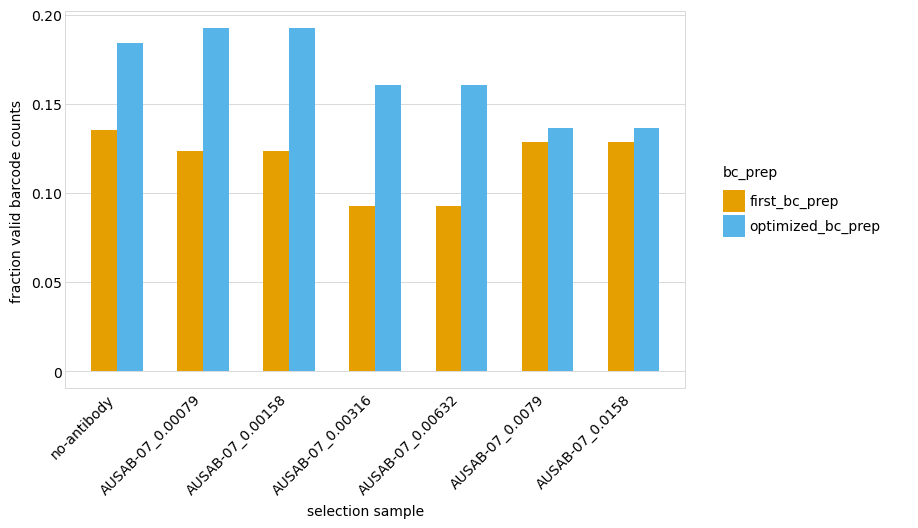

In [114]:
seq_counts_full_tidy['sample'] = pd.Categorical(
    seq_counts_full_tidy['sample'], categories=[
        'no-antibody', 'AUSAB-07_0.00079', 'AUSAB-07_0.00158', 'AUSAB-07_0.00316', 'AUSAB-07_0.00632', 
        'AUSAB-07_0.0079', 'AUSAB-07_0.0158'], ordered=True
)

p = (
    ggplot(
        seq_counts_full_tidy,
        aes(x='sample', 
            y='fraction_valid_counts', 
            fill='bc_prep'
           )
    ) +
    geom_bar(stat='identity', position=position_dodge(), width=0.6) +
    theme(figure_size=(8, 5),
         panel_grid_major_x=element_blank(),
          axis_text_x = element_text(rotation=45, hjust=1)
         ) + 
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='selection sample', 
         y='fraction valid barcode counts')
)



_ = p.draw()

p.save('scratch_notebooks/220801_summary_figures/scratch_figs/fraction_valid_bc_counts')

In [18]:
seq_counts_full_tidy_small = seq_counts_full_tidy.loc[seq_counts_full_tidy['bc_prep'] == 'first_bc_prep']

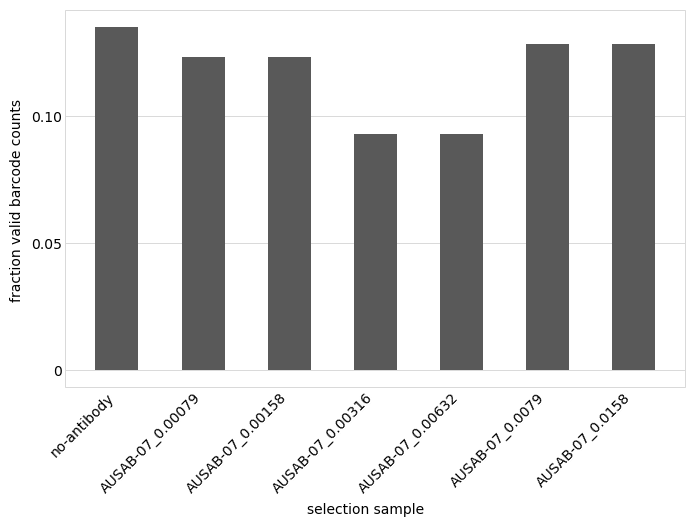

In [21]:
seq_counts_full_tidy_small['sample'] = pd.Categorical(
    seq_counts_full_tidy_small['sample'], categories=[
        'no-antibody', 'AUSAB-07_0.00079', 'AUSAB-07_0.00158', 'AUSAB-07_0.00316', 'AUSAB-07_0.00632', 
        'AUSAB-07_0.0079', 'AUSAB-07_0.0158'], ordered=True
)

p = (
    ggplot(
        seq_counts_full_tidy_small,
        aes(x='sample', 
            y='fraction_valid_counts'
           )
    ) +
    geom_bar(stat='identity', position=position_dodge(), width=0.5) +
    theme(figure_size=(8, 5),
         panel_grid_major_x=element_blank(),
          axis_text_x = element_text(rotation=45, hjust=1)
         ) + 
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='selection sample', 
         y='fraction valid barcode counts')
)



_ = p.draw()

p.save('scratch_notebooks/220801_summary_figures/scratch_figs/fraction_valid_bc_counts_early_only.pdf')